In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_IND = df[df['job_country'] == 'India']

In [3]:
df_IND

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,"[powershell, python, sql, mysql, sql server, d...","{'cloud': ['databricks', 'azure'], 'databases'..."
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","[sql, python, databricks, power bi, excel, wor...","{'analyst_tools': ['power bi', 'excel', 'word'..."
42,Senior Data Engineer,"Senior Data Engineer(Python)-1563,1637&1633","Chennai, Tamil Nadu, India",via HR Software For Growing Businesses | Fresh...,Full-time,False,India,2023-11-10 13:30:41,True,False,India,None,NaN,NaN,CESIT,"[python, sql, aws, pyspark, docker, jira]","{'async': ['jira'], 'cloud': ['aws'], 'librari..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785712,Data Engineer,India - Collections Analyst II,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Varite India Private Limited,"[excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']}"
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,"[c#, sql]","{'programming': ['c#', 'sql']}"
785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Diebold Nixdorf,None,None


In [4]:
df_skills = df_IND.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
16,Big Data Engineer,powershell
16,Big Data Engineer,python
16,Big Data Engineer,sql
16,Big Data Engineer,mysql
16,Big Data Engineer,sql server
...,...,...
785716,Application Support Analyst,c#
785716,Application Support Analyst,sql
785718,Senior Performance QA Analyst,None
785740,AWS System Analyst,aws


In [5]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# Name the count column as count
df_skills_count = df_skills_count.reset_index(name='skill_count')

# Sort the values by skill_count in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
34,angular.js,Data Scientist,1
49,arch,Business Analyst,1
787,mlpack,Data Engineer,1
1679,yarn,Senior Data Scientist,1


In [6]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

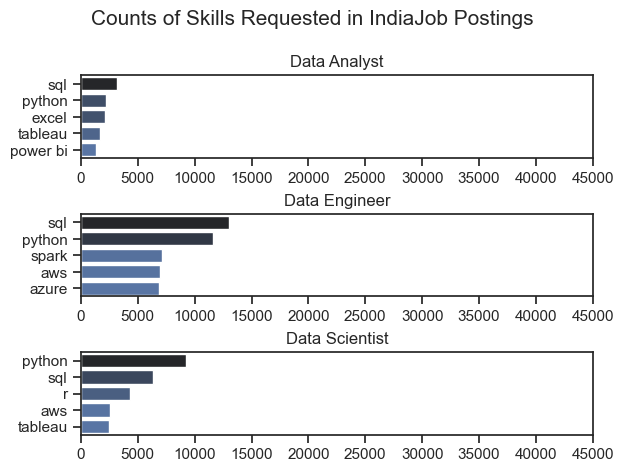

In [8]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 45000) # make the scales the same

fig.suptitle('Counts of Skills Requested in IndiaJob Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

In [9]:
df_job_title_count = df_IND['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Engineer,19062
1,Data Scientist,13279
2,Data Analyst,6121
3,Senior Data Engineer,4353
4,Senior Data Scientist,2486
5,Business Analyst,1887
6,Software Engineer,1795
7,Senior Data Analyst,1083
8,Machine Learning Engineer,671
9,Cloud Engineer,351


In [10]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,angular.js,Data Scientist,1,13279,0.007531
1685,arch,Business Analyst,1,1887,0.052994
1686,mlpack,Data Engineer,1,19062,0.005246
1687,yarn,Senior Data Scientist,1,2486,0.040225


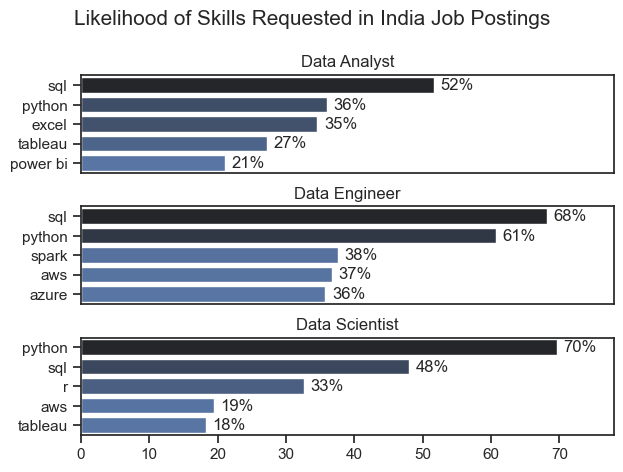

In [11]:

fig, ax = plt.subplots(len(job_titles), 1)


for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)
    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in India Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()